<a href="https://colab.research.google.com/github/muqeetahmaad9/student-performance-internship/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    200 non-null    float64
 1   sleep          200 non-null    float64
 2   participation  200 non-null    int64  
 3   final_score    200 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 6.4 KB
None
       study_hours       sleep  participation  final_score
count   200.000000  200.000000     200.000000   200.000000
mean      4.917454    7.116715       2.955000    71.277672
std       1.852426    1.391881       1.418816    18.247046
min       0.000000    4.000000       1.000000    11.894384
25%       3.589745    6.091244       2.000000    59.401997
50%       4.991616    7.118259       3.000000    72.475577
75%       6.001705    8.030847       4.000000    85.247952
max      10.000000   10.000000       5.000000   100.000000


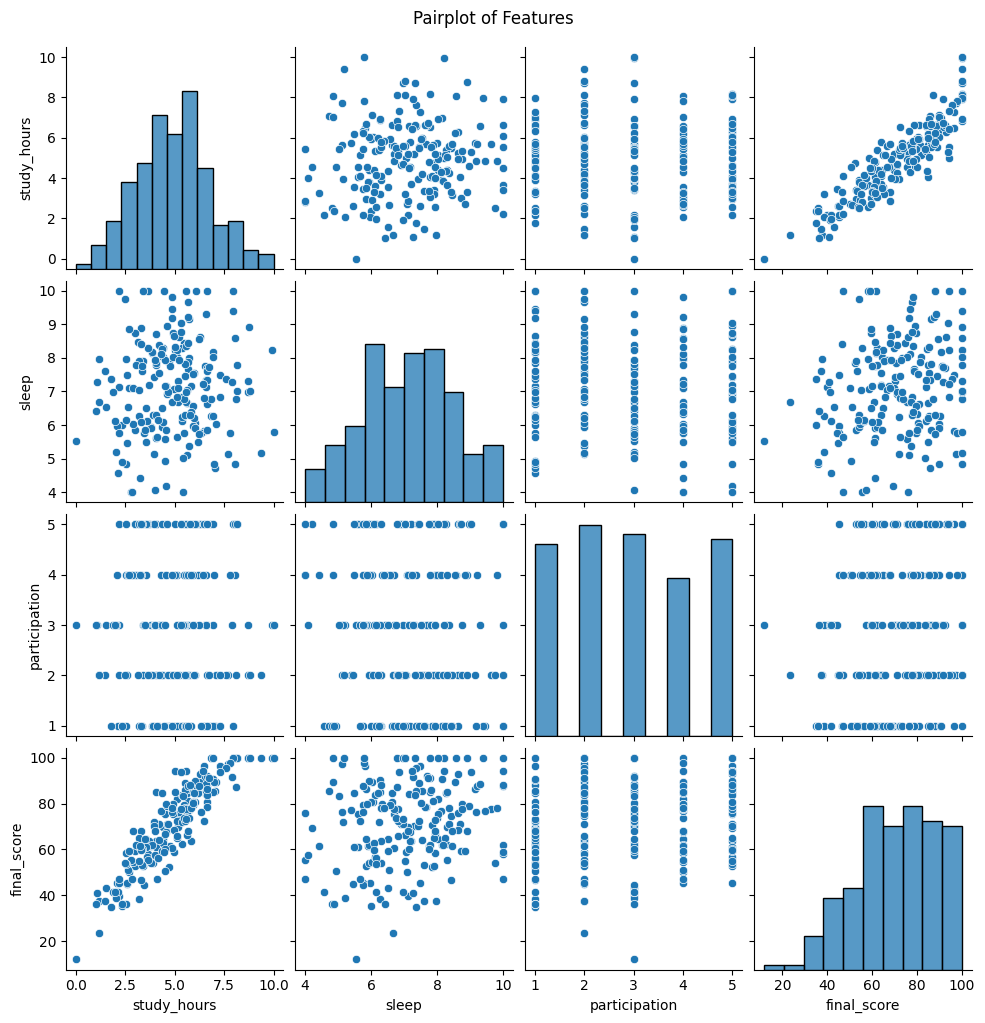

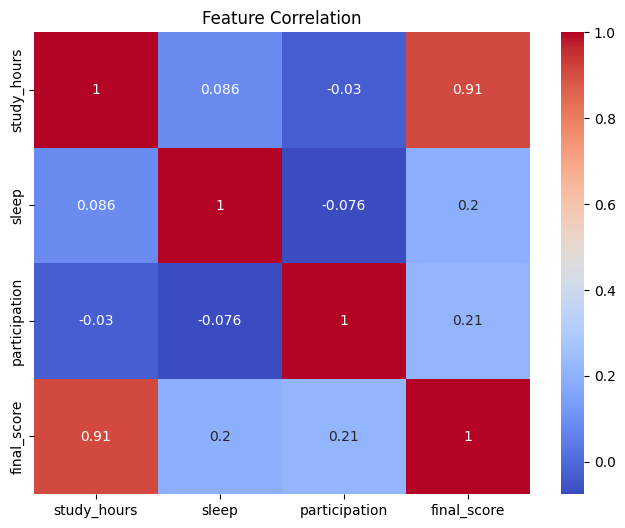


Model Evaluation Summary:
                                            MSE      RMSE  R2 Score
Linear Regression (study_hours only)  56.981985  7.548641  0.794069
Linear Regression (all features)      29.681826  5.448103  0.892731
Polynomial Regression (degree=2)      28.855467  5.371728  0.895717
Polynomial Regression (degree=3)      25.018726  5.001872  0.909583


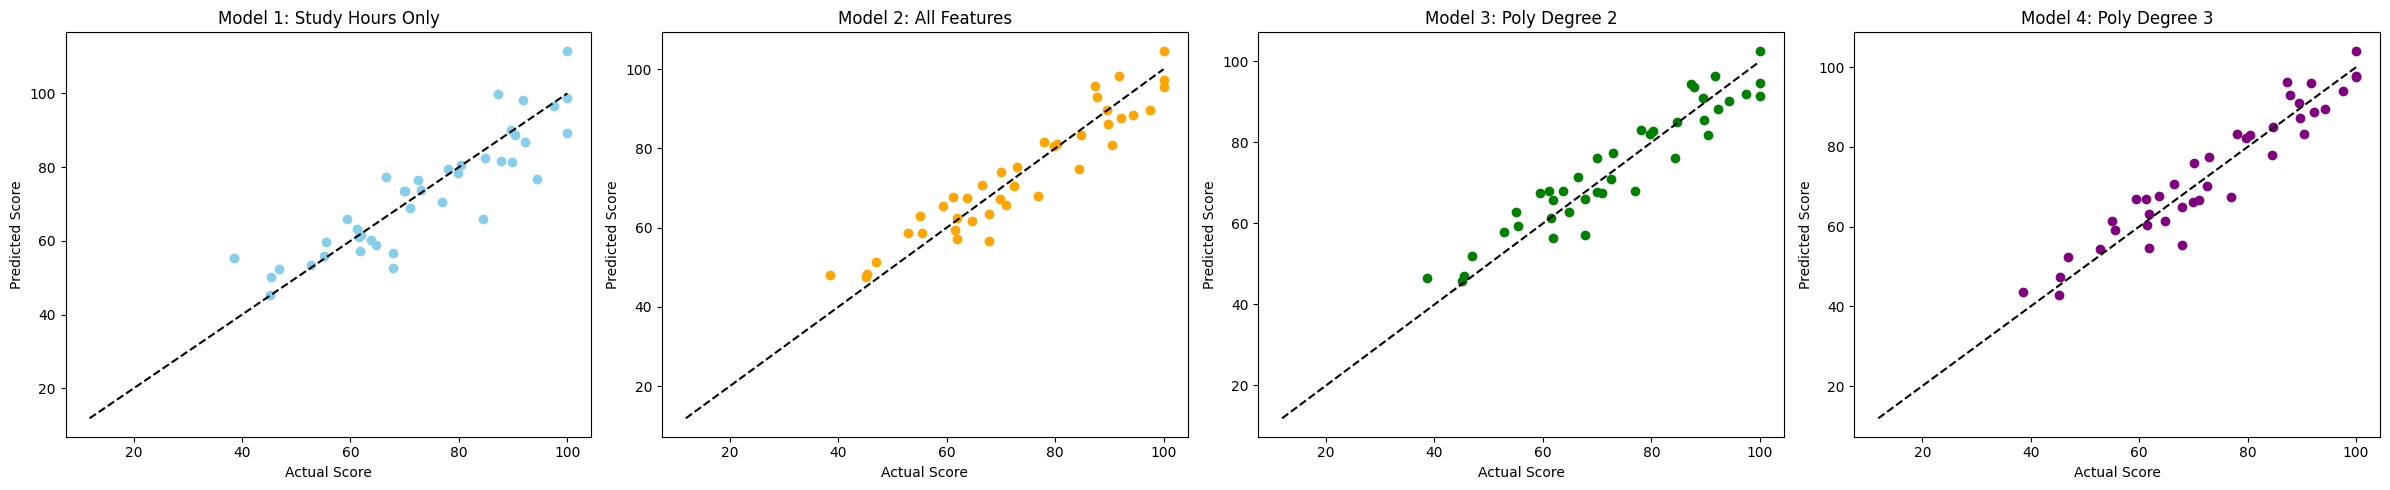

In [7]:
# Student Exam Score Prediction using Regression

# 1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 2. Generate Mock Dataset (similar to Student Performance Factors)
np.random.seed(42)
n_samples = 200
study_hours = np.random.normal(5, 2, n_samples).clip(0, 10)
sleep = np.random.normal(7, 1.5, n_samples).clip(4, 10)
participation = np.random.randint(1, 6, n_samples)
noise = np.random.normal(0, 5, n_samples)
final_score = (study_hours * 10 + participation * 3 + sleep * 2 + noise).clip(0, 100)

df = pd.DataFrame({
    'study_hours': study_hours,
    'sleep': sleep,
    'participation': participation,
    'final_score': final_score
})

# 3. Data Cleaning and Visualization
print(df.info())
print(df.describe())
sns.pairplot(df)
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

# 4. Feature Correlation
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

# 5. Model 1: Linear Regression with study_hours only
X1 = df[['study_hours']]
y = df['final_score']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.2, random_state=42)

model1 = LinearRegression()
model1.fit(X1_train, y1_train)
y1_pred = model1.predict(X1_test)

# 6. Model 2: Linear Regression with all features
X2 = df[['study_hours', 'sleep', 'participation']]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=42)

model2 = LinearRegression()
model2.fit(X2_train, y2_train)
y2_pred = model2.predict(X2_test)

# 7. Model 3: Polynomial Regression with all features (Degree 2)
poly2 = PolynomialFeatures(degree=2)
X2_poly2 = poly2.fit_transform(X2)
X2p2_train, X2p2_test, yp2_train, yp2_test = train_test_split(X2_poly2, y, test_size=0.2, random_state=42)

poly_model2 = LinearRegression()
poly_model2.fit(X2p2_train, yp2_train)
yp2_pred = poly_model2.predict(X2p2_test)

# 8. Model 4: Polynomial Regression with all features (Degree 3)
poly3 = PolynomialFeatures(degree=3)
X2_poly3 = poly3.fit_transform(X2)
X2p3_train, X2p3_test, yp3_train, yp3_test = train_test_split(X2_poly3, y, test_size=0.2, random_state=42)

poly_model3 = LinearRegression()
poly_model3.fit(X2p3_train, yp3_train)
yp3_pred = poly_model3.predict(X2p3_test)

# 9. Evaluation Function
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, r2

# 10. Evaluate All Models
results = {
    "Linear Regression (study_hours only)": evaluate_model(y1_test, y1_pred),
    "Linear Regression (all features)": evaluate_model(y2_test, y2_pred),
    "Polynomial Regression (degree=2)": evaluate_model(yp2_test, yp2_pred),
    "Polynomial Regression (degree=3)": evaluate_model(yp3_test, yp3_pred)
}

results_df = pd.DataFrame(results, index=["MSE", "RMSE", "R2 Score"]).T
print("\nModel Evaluation Summary:")
print(results_df)

# 11. Visualization of Predictions vs Actual
plt.figure(figsize=(24, 5))

plt.subplot(1, 4, 1)
plt.scatter(y1_test, y1_pred, color='skyblue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.title('Model 1: Study Hours Only')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')

plt.subplot(1, 4, 2)
plt.scatter(y2_test, y2_pred, color='orange')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.title('Model 2: All Features')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')

plt.subplot(1, 4, 3)
plt.scatter(yp2_test, yp2_pred, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.title('Model 3: Poly Degree 2')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')

plt.subplot(1, 4, 4)
plt.scatter(yp3_test, yp3_pred, color='purple')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.title('Model 4: Poly Degree 3')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')

plt.tight_layout()
plt.show()
